# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

###### CLT is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [14]:
medical.shape

(1338, 8)

In [15]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

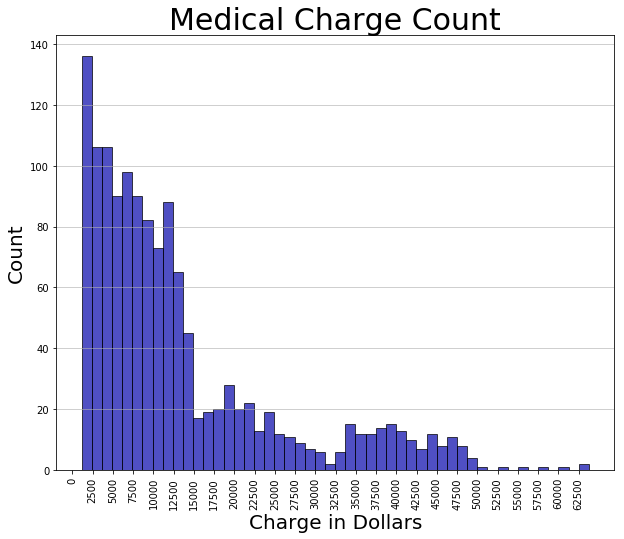

The mean of medical charges is 13270.422265141257 dollars
The standard deviation of medical charges is 12105.484975561605


In [149]:
plt.figure(figsize=[10,8])
plt.hist(medical.charges, bins = 50, histtype ='bar',color='#0504aa',alpha=0.7, ec = 'black')


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Charge in Dollars', fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.title('Medical Charge Count', fontsize = 30)
plt.xticks(range(0,65000,2500),rotation = 'vertical')

plt.show()



print('The mean of medical charges is {} dollars'.format(np.mean(medical.charges)))
print('The standard deviation of medical charges is {}'.format(np.std(medical.charges)))

__A:__ The mean and standard deviation are appropriate.  The median wouldn't be appropriate as it looks like more people pay under 15000.   There is a skew and the distribution is not normal. 

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The data is skewed to the right.  Therefore the assumption of it being normally distributed fails for a t-test.  However, we have a large sample size over 1000 which should mean that the CLT should hold.  

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ It should be one tailed since we are concerned whether the charge has fallen below 12000 and not concerned with if it is over 12000.  The mean is 13270 for the sample collected and should not be concerned at first glance.

In [31]:
#Crit Value with sample size of 1338
t_crit = t.ppf(0.95, 1338-1)
print("The crit t value is for one tailed 95 percent confidence interval is: {} ".format(t_crit))

The crit t value is for one tailed 95 percent confidence interval is: 1.6459941145571317 


In [33]:
# The standard error is the approximate standard deviation of a statistical sample population. 
#The standard error is a statistical term that measures the accuracy with which a sample represents a population. 
#In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error.

se = (np.std(medical.charges)) / (np.sqrt(len(medical)))
margin = t_crit *  se
print("Margin of error is: {} ".format(margin))

The margin of error is: 544.7314053390934 


In [39]:
lower = (np.mean(medical.charges)) - margin
print('The lower bound is {}'.format(lower) + ', Admin shouldn\'t be concerened as we are 95 percent conident it lies above {}'.format(lower))

The lower bound is 12725.690859802164, Admin shouldn't be concerened as we are 95 percent conident it lies above 12725.690859802164


##### The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ 

The H0 would be that people with insurance are charged the same.  
The HA would be that they are charged differently. 

The two assumptions are:
1. Data, when plotted, results in a normal distribution, bell-shaped distribution curve.
2. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [81]:
# https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
print(medical.columns)
print(medical.insuranceclaim.head()) # 1 has insurance claim 0 has no insurance
#seperate the groups
insured = medical.loc[medical['insuranceclaim'] == 1, 'charges']
uninsured = medical.loc[medical['insuranceclaim'] == 0, 'charges']
n1 = sum(medical['insuranceclaim'] == 1)
n0 = sum(medical['insuranceclaim'] == 0)
x1 = (np.mean(insured))
x0 = (np.mean(uninsured))
s1 = (np.std(insured,ddof = 1))
s0 = (np.std(uninsured, ddof =1))

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')
0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64


In [80]:
# Pooled Standard Devation and critical t value
pooled_std = np.sqrt((((n0-1)*s0**2) + ((n1-1)*s1**2))/(n0 +n1 -2))
print('Pooled std is {}'.format(pooled_std))
crit_t = (x0 - x1) /((pooled_std) * np.sqrt((1/n0) +(1/n1)))
print('Critical t value is {}'.format(crit_t))

Pooled std is 11520.034268775256
Critical t value is -11.89329903087671


In [94]:
# P value 
p_value = 2*t.cdf(crit_t, df = n0+n1-2)
print(f'p value is {p_value}' + ' which is less than 0.05 so we reject H0' '\n' ' People with insurance are charged differently')

p value is 4.461230231620972e-31 which is less than 0.05 so we reject H0
 People with insurance are charged differently


In [105]:
# using module to see if we manually did it correctly
#https://docs.scipy.org/doc/scipy/reference/stats.html
#ttest_ind(a, b[, axis, equal_var, nan_policy]) Calculate the T-test for the means of two independent samples of scores.
from scipy.stats import ttest_ind
print(ttest_ind(uninsured,insured))

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [106]:
print(ttest_ind(uninsured,insured, equal_var = False))

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)


##### We still reject the null hypothesis from the pvalue since it's less than 0.05.  Still come to the conclusion that insured vs uninsured are charged differently

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

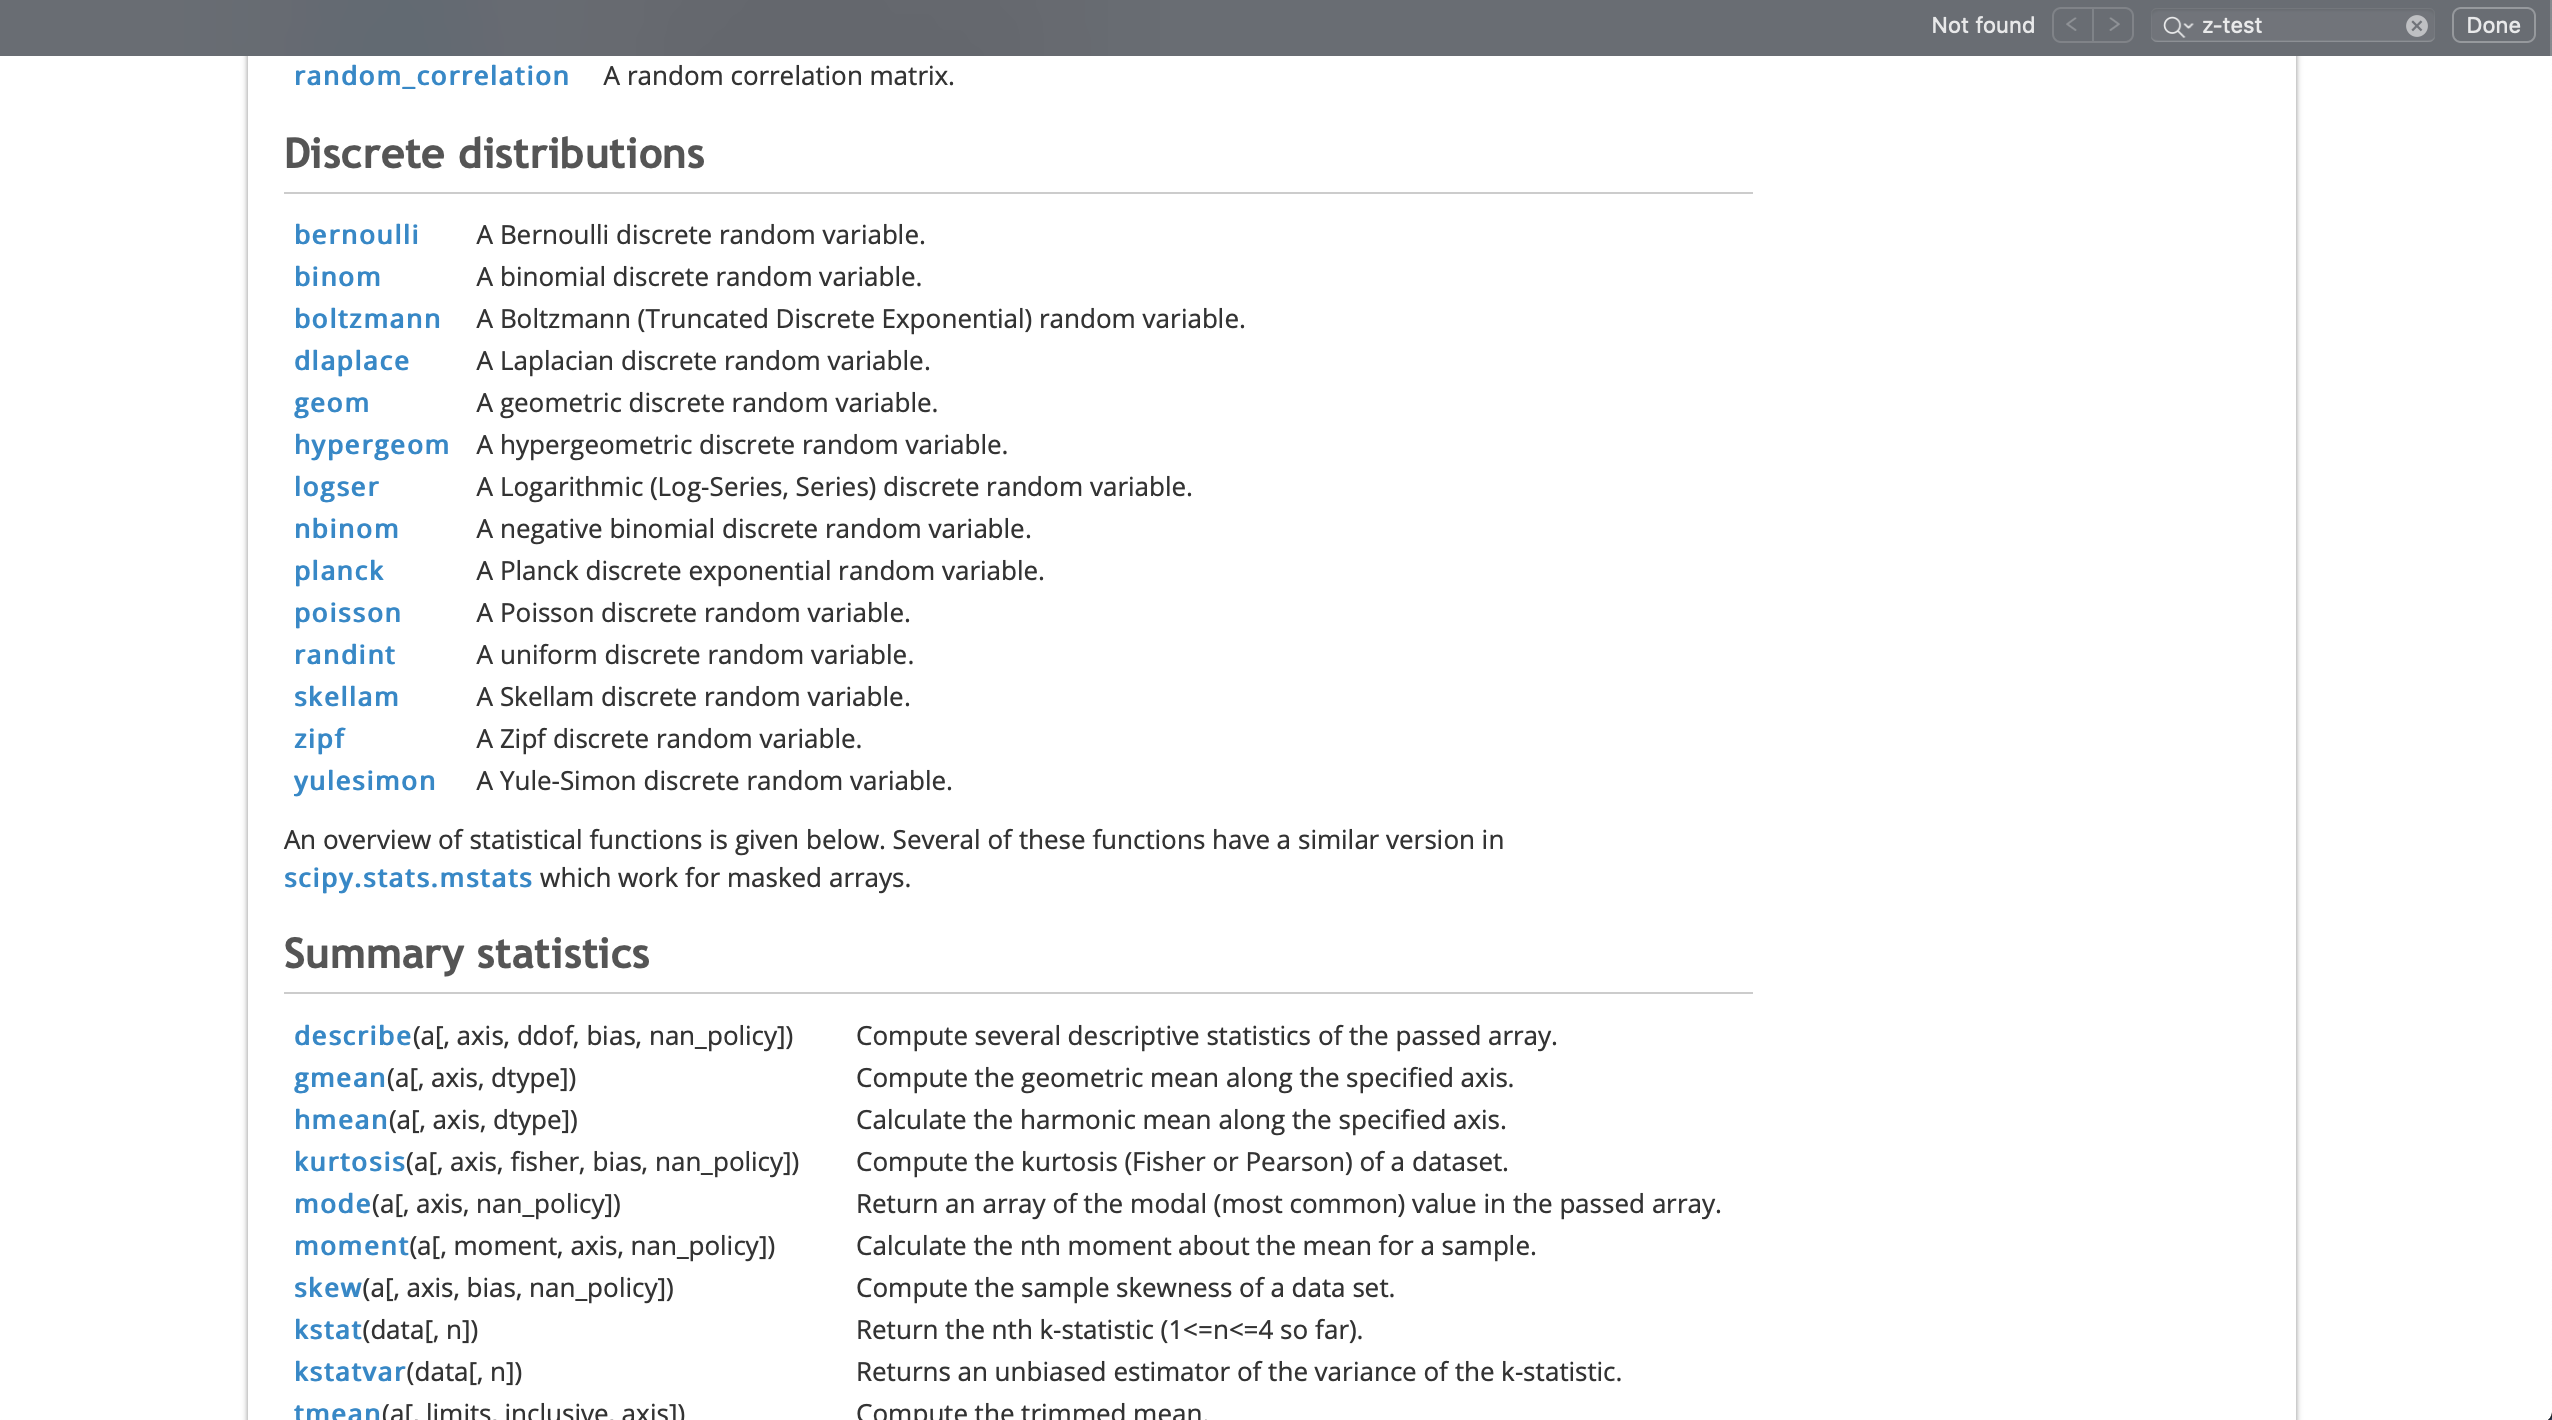

In [112]:
from IPython.display import Image
Image(filename = 'img/python.png', width = 500,height = 500)

__A:__ From the above image, I ran a search through the documentation and wasn't able to find anything.  The assumption for a z-test is that the samples taken are normally distributed and the population standard deviation has to be known.  However, in this case we do not know the pop standard dev.  The t-test due to the CLT should yield the same results with a large enough population.  Which in this case is 1338 and over the rule of thumb 1000.  Therefore, it should yield similar results.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test